In [4]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests

In [5]:
df = pd.read_excel("SalaryData.xlsx")

In [6]:
X = df[['Age', 'Sales', 'Profits', 'Mktval', 'Profmarg']]

In [7]:
y = df['Salary']

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

#predict the salary of the CEO where the Sales are 6200, profits are 966, Mktval is 23200, and proftmarg is 15.58065
predictedSalary = regr.predict([[49, 6200, 966, 23200, 15.58065]])

print(predictedSalary)

[1352.63126529]


c:\Users\sm915\PycharmProjects\sem7\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
# finding the coefficient
# we can ask for the coefficient value of sales, profits, mktval and profmrg against salary. The answer(s) 
# we get tells us what would happen if we increase, or decrease, one of the independent values.
print(regr.coef_)

[ 4.56986058  0.0138669   0.07296886  0.02262956 -1.65589272]


In [10]:
# what if we alter the values 
predictedSalary = regr.predict([[43, 283, 48, 1100, 16.96113]])

print(predictedSalary)

[673.77714023]


c:\Users\sm915\PycharmProjects\sem7\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# predicting for one more employee
predictedSalary = regr.predict([[63, 4800, 191, 2100, 3.979167]])

print(predictedSalary)

[882.37198266]


c:\Users\sm915\PycharmProjects\sem7\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# scaling the data
scale = StandardScaler()
scaledX = scale.fit_transform(X)

print(scaledX)

[[-8.84653594e-01  4.39852986e-01  1.87986711e+00  3.05098471e+00
   5.14341824e-01]
 [-1.59910387e+00 -5.34711451e-01 -3.96296765e-01 -3.89211745e-01
   5.91852390e-01]
 [-6.46503501e-01 -5.53487917e-01 -4.16132616e-01 -3.89211745e-01
   9.68462626e-01]
 [-1.70203315e-01 -4.00146782e-01 -6.49203863e-01 -4.04778245e-01
  -6.36106880e-01]
 [-1.48002883e+00 -5.23511454e-01 -4.45886392e-01 -5.00200889e-01
   8.74272038e-02]
 [ 9.01472104e-01  2.54808770e+00  1.00708968e+00  4.66502495e-02
  -1.79028225e-01]
 [ 3.06096871e-01 -4.93040875e-01 -4.55804317e-01 -4.63463950e-01
  -1.09066528e-01]
 [ 7.82397057e-01  2.09264814e-01 -4.17309319e-02 -2.33546747e-01
  -1.37052993e-01]
 [-1.12280369e+00 -4.80852643e-01 -4.97955500e-01 -4.89771334e-01
  -2.96041848e-01]
 [ 9.01472104e-01 -1.03676276e-01  5.49688408e-02  4.66502495e-02
   8.48347031e-02]
 [-2.89278362e-01 -3.83676199e-01 -4.31009504e-01 -4.77473799e-01
  -2.01388762e-01]
 [ 1.13962220e+00 -4.89087934e-01 -4.95476019e-01 -4.86191039e-01

In [13]:
# now predicting the salary based on the scaling
regr.fit(scaledX, y)

scaled = scale.transform([[49, 6200, 966, 23200, 15.58065]])

predictedSalary = regr.predict([scaled[0]])
print(predictedSalary)

[1352.63126529]


c:\Users\sm915\PycharmProjects\sem7\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


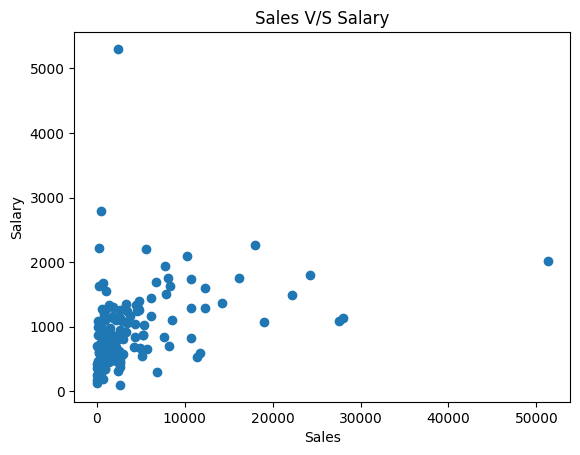

In [14]:
# now checking it visually
plt.scatter(df['Sales'], y)
plt.xlabel('Sales')
plt.ylabel('Salary')
plt.title('Sales V/S Salary')
plt.show()

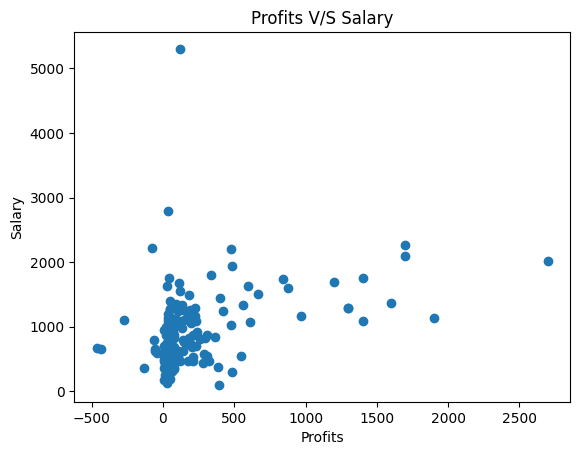

In [15]:
# now checking it visually
plt.scatter(df['Profits'], y)
plt.xlabel('Profits')
plt.ylabel('Salary')
plt.title('Profits V/S Salary')
plt.show()

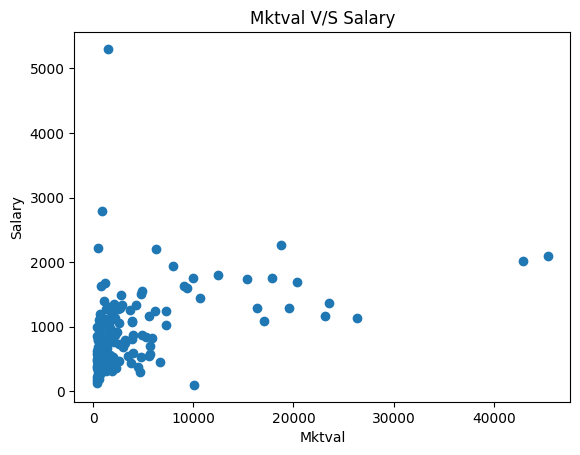

In [16]:
# now checking it visually
plt.scatter(df['Mktval'], y)
plt.xlabel('Mktval')
plt.ylabel('Salary')
plt.title('Mktval V/S Salary')
plt.show()

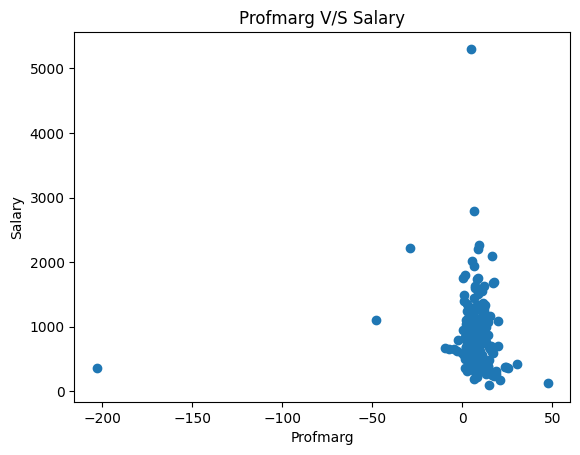

In [17]:
# now checking it visually
plt.scatter(df['Profmarg'], y)
plt.xlabel('Profmarg')
plt.ylabel('Salary')
plt.title('Profmarg V/S Salary')
plt.show()

In [18]:
# null hypothesis for any relation between X and y
X_mean = np.mean(df['Sales'])
y_mean = np.mean(y)
print("independent Variables mean : ", X_mean)
print("dependent variables mean : ", y_mean)

X_std = np.std(df['Sales'])
y_std = np.std(y)
print("independent Variables std : ", X_std)
print("dependent variables std : ", y_std)

ztest,pval = stests.ztest(df['Sales'],y)
print("p-value", pval)

if (pval < 0.05).all():
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

independent Variables mean :  3529.463276836158
dependent variables mean :  865.8644067796611
independent Variables std :  6071.4302431802635
dependent variables std :  585.9270733519616
p-value 6.904341618426814e-09
we reject null hypothesis


In [19]:
# null hypothesis for any relation between X and y
X_mean = np.mean(df['Profits'])
y_mean = np.mean(y)
print("independent Variables mean : ", X_mean)
print("dependent variables mean : ", y_mean)

X_std = np.std(df['Profits'])
y_std = np.std(y)
print("independent Variables std : ", X_std)
print("dependent variables std : ", y_std)

ztest,pval = stests.ztest(df['Profits'],y)
print("p-value", pval)

if (pval < 0.05).all():
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

independent Variables mean :  207.83050847457628
dependent variables mean :  865.8644067796611
independent Variables std :  403.3101518896537
dependent variables std :  585.9270733519616
p-value 1.2684794713790172e-34
we reject null hypothesis


In [20]:
# null hypothesis for any relation between X and y
X_mean = np.mean(df['Mktval'])
y_mean = np.mean(y)
print("independent Variables mean : ", X_mean)
print("dependent variables mean : ", y_mean)

X_std = np.std(df['Mktval'])
y_std = np.std(y)
print("independent Variables std : ", X_std)
print("dependent variables std : ", y_std)

ztest,pval = stests.ztest(df['Mktval'],y)
print("p-value", pval)

if (pval < 0.05).all():
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

independent Variables mean :  3600.316384180791
dependent variables mean :  865.8644067796611
independent Variables std :  6424.051723326085
dependent variables std :  585.9270733519616
p-value 1.8695929125067086e-08
we reject null hypothesis


In [21]:
# null hypothesis for any relation between X and y
X_mean = np.mean(df['Profmarg'])
y_mean = np.mean(y)
print("independent Variables mean : ", X_mean)
print("dependent variables mean : ", y_mean)

X_std = np.std(df['Profmarg'])
y_std = np.std(y)
print("independent Variables std : ", X_std)
print("dependent variables std : ", y_std)

ztest,pval = stests.ztest(df['Profmarg'],y)
print("p-value", pval)

if (pval < 0.05).all():
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

independent Variables mean :  6.420110533333333
dependent variables mean :  865.8644067796611
independent Variables std :  17.810216942233694
dependent variables std :  585.9270733519616
p-value 2.88807355628752e-84
we reject null hypothesis


In [22]:
# null hypothesis for any relation between X and y
X_mean = np.mean(df['Age'])
y_mean = np.mean(y)
print("independent Variables mean : ", X_mean)
print("dependent variables mean : ", y_mean)

X_std = np.std(df['Age'])
y_std = np.std(y)
print("independent Variables std : ", X_std)
print("dependent variables std : ", y_std)

ztest,pval = stests.ztest(df['Age'],y)
print("p-value", pval)

if (pval < 0.05).all():
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

independent Variables mean :  56.429378531073446
dependent variables mean :  865.8644067796611
independent Variables std :  8.39806516310947
dependent variables std :  585.9270733519616
p-value 5.203164789674818e-75
we reject null hypothesis


In [23]:
# null hypothesis for any relation between X and y
X_mean = np.mean(df['CeoTen'])
y_mean = np.mean(y)
print("independent Variables mean : ", X_mean)
print("dependent variables mean : ", y_mean)

X_std = np.std(df['CeoTen'])
y_std = np.std(y)
print("independent Variables std : ", X_std)
print("dependent variables std : ", y_std)

ztest,pval = stests.ztest(df['CeoTen'],y)
print("p-value", pval)

if (pval < 0.05).all():
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

independent Variables mean :  7.954802259887006
dependent variables mean :  865.8644067796611
independent Variables std :  7.130597085196114
dependent variables std :  585.9270733519616
p-value 4.907293974344732e-84
we reject null hypothesis
